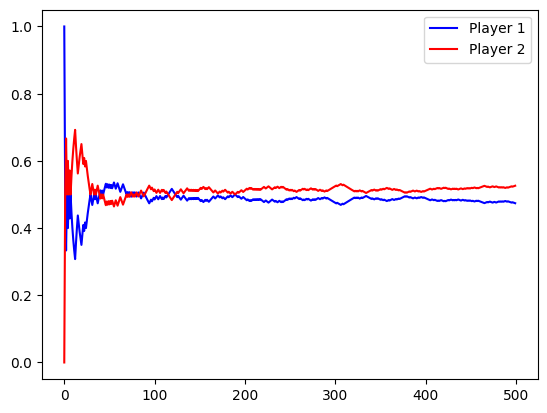

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Runs a game of RR
# Returns the winner
# This code is intentionally coded poorly to clearly represent flow of the game
# 0 represents player 1 win
# 1 represents player 2 win
def runGame():
  number = np.random.randint(1, 7) # Generate a number corresponding to the position the shot is in
  if number == 1:
    return 1
  else:
    if number == 2:
      return 0
    else:
      if number == 3:
        return 1
      else:
        if number == 4:
          return 0
        else:
          if number == 5:
            return 1
          else:
            return 0

# Simple wrapper for runGame that lets you choose how many times to run
def runGames(num):
  results = []
  for i in range(num):
    results.append(runGame())
  return results

# outputs two vectors representing each players WR over time
def getMovingWRs(results):
  p1 = []
  p2 = []
  for i in range(len(results)):
    n = i + 1
    p2Wins = sum(results[0:i+1])
    p1Wins = n - p2Wins
    p1.append(p1Wins/n)
    p2.append(p2Wins/n)

  return [p1, p2]

# Simple 500 game match
results = runGames(500)
p1WR, p2WR = getMovingWRs(results)
plt.plot(np.arange(500), p1WR, color = "blue", label = "Player 1")
plt.plot(np.arange(500), p2WR, color = "red", label = "Player 2")
plt.legend()
plt.show()



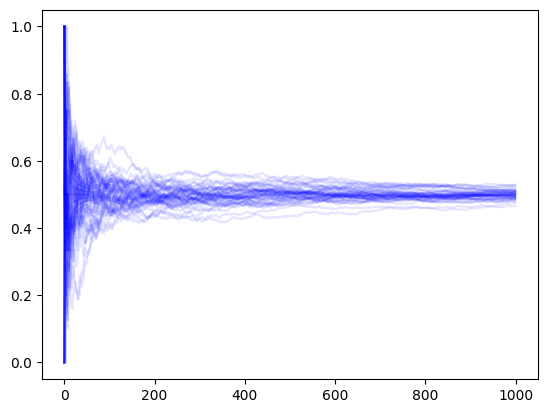

Average Winrate for Player 1:  49.97 %


In [24]:
# Monte Carlo
roundSize = 1000 # Number of games played in each sim
simNum = 50 # Number of simulations to do
finalWRs = []
for i in range(simNum):
  curResults = runGames(roundSize)
  p1WR, p2WR = getMovingWRs(curResults)
  finalWRs.append(p1WR[-1])
  plt.plot(np.arange(roundSize), p1WR, color = "blue", alpha = .1)
plt.show()
print("Average Winrate for Player 1: ", np.round(np.mean(finalWRs) * 100, 4), "%")